<a href="https://colab.research.google.com/github/akritidu/Multi-label-Classification-in-the-Home-Improvement/blob/main/LSTM_Bi_LSTM_GRU_Bi_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import array
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten, LSTM, GRU, Bidirectional, GlobalAveragePooling1D
from tensorflow.keras.layers import GlobalMaxPooling1D, SpatialDropout1D, GlobalMaxPool1D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Phishload3columnasV3sinNaN.csv') #actual


In [4]:
df.shape

(10374, 3)

In [4]:
train_df = df

In [5]:
train_df

,contexts,ham,phishing
0,"<!DOCTYPE html>\r\n<html xmlns=""http://www.w3....",1,0
1,"<!DOCTYPE html>\r\n<html xmlns=""http://www.w3....",1,0
2,"<!DOCTYPE html>\r\n<html xmlns=""http://www.w3....",1,0
3,"<!DOCTYPE html>\r\n<html xmlns=""http://www.w3....",1,0
4,"<!DOCTYPE html>\r\n<html xmlns=""http://www.w3....",1,0
5,<!DOCTYPE html>\r\n<!-- Sysops: Please do not ...,1,0
6,<!-- ServerInfo: BAYIDSLGN1M58 2012.01.05.13.5...,1,0
7,"<!DOCTYPE html>\r\n<html xmlns=""http://www.w3....",1,0
8,"<!DOCTYPE html>\r\n<html xmlns=""http://www.w3....",1,0
9,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T...",1,0


In [6]:
train_df.dtypes

contexts    object
ham          int64
phishing     int64
dtype: object

In [119]:
n1=0
n2=0
for i in train_df.index:
    n1 = len((train_df.loc[i, 'contexts']).split())
    train_df.loc[i, 'nwords'] = n1
    n2 = n2 + n1
print (n2)
print (i)
print (n2/i)

12155232
10373
1171.8145184613902


In [120]:
n1=0
n2=0
for i in train_df.index:
    if train_df.loc[i, 'nwords'] < 6000: 
#         print (i)
        n1 = n1 + 1
print (n1)


9972


In [6]:
train_df.loc[5853, 'nwords']

42.0

In [7]:
listSum = 0
for i in range(len(train_df)):
     if train_df.ham[i] == 1:
        listSum += 1

print(listSum)

1176


In [10]:
categories = train_df[['ham', 'phishing']]
categories.head()

,ham,phishing
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [7]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

#Lemmatize Words

def fetch_pos_tag(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        # As default pos in lemmatization is Noun
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()

#cleaning the data now 

regex = [
    r'<[^>]+>', #HTML tags
    r'@(\w+)', # @-mentions
    r"#(\w+)", # hashtags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
    r'[^0-9a-z #+_\\r\\n\\t]', #BAD SYMBOLS
]

REPLACE_URLS = re.compile(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+')
REPLACE_HASH = re.compile(r'#(\w+)')
REPLACE_AT = re.compile(r'@(\w+)')
REPLACE_HTML_TAGS = re.compile(r'<[^>]+>')
REPLACE_DIGITS = re.compile(r'\d+')
#REPLACE_BY = re.compile(r"[/(){}\[\]\|,;.:?\-\'\"$]")
REPLACE_BY = re.compile(r"[^a-z0-9\-]")

STOPWORDS = set(stopwords.words('english'))

#tokens_re = re.compile(r'('+'|'.join(regex)+')', re.VERBOSE | re.IGNORECASE)

# sentences = [] #for Word2Vec model

def clean_text(text):
    text = text.lower()
    text = REPLACE_HTML_TAGS.sub(' ', text)
    text = REPLACE_URLS.sub('', text)
    text = REPLACE_HASH.sub('', text)
    text = REPLACE_AT.sub('', text)
    text = REPLACE_DIGITS.sub(' ', text)
    text = REPLACE_BY.sub(' ', text)
    
    
    text = " ".join(lemmatizer.lemmatize(word.strip(), fetch_pos_tag(pos_tag([word.strip()])[0][1])) for word in text.split() if word not in STOPWORDS and len(word)>3)
    
    #sentences.append(text.split())
    return text



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [8]:
train_df['contexts'] = train_df['contexts'].apply(clean_text)

In [11]:
## for single output layer
X  = train_df['contexts'] 
y = categories.values

In [12]:
X

0        google window google bypjtqaxxnab getei functi...
1        function envflush function window require requ...
2        timing timing timing tick function label time ...
3        yahoo deutschland roundtrip rttop number date ...
4        html overflow-y auto body font arial text-alig...
5        wikipedia unicode-bidi embed white-space nowra...
6        dtfirstbyte date meta http-equiv refresh conte...
7        blogger erstellen kostenloses blog html body t...
8        twitter document domain twitter copy twttr app...
9        body margin pad font-size line-height font-fam...
10       date image image pkpdm atvpdkikx uedata gatewa...
11       window window global webtrack object timing in...
12       google window google frjlt dopztiz getei funct...
13       deutschland hotmail skype messenger sowie nach...
14       window config appid monitor date body font-fam...
15       yahoo japan body form fieldset input button bl...
16       function padurl location href indexof return i.

In [13]:
y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [15]:

tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [16]:
from numpy import array
from numpy import asarray
from numpy import zeros


embeddings_dictionary = dict()

glove_file = open("../Datasets/glove.6B.100d.txt", encoding="utf-8")
# open("glove.6B.50d.txt", 'r', encoding="utf-8") como f:

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# **GRU**

In [17]:
import tensorflow as tf
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras import Model, Input, Sequential
from tensorflow.keras.layers import Dense, Input, LSTM, SimpleRNN, Embedding, Dropout, SpatialDropout1D, Activation, Conv1D,GRU
from tensorflow.keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, Add, Flatten
from tensorflow.keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate, SpatialDropout1D



In [18]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs )
model = SpatialDropout1D(0.2)(embedding_layer)
model = GRU(128, return_sequences=True,dropout=0.1,recurrent_dropout=0.1)(model)
model = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(model)
avg_pool = GlobalAveragePooling1D()(model)
max_pool = GlobalMaxPooling1D()(model)
model = concatenate([avg_pool, max_pool])
dense_layer1 = Dense(2, activation="sigmoid")(model)
GRU_glove = Model(deep_inputs , dense_layer1)
GRU_glove.compile(loss='binary_crossentropy',optimizer='adam',metrics=[tf.keras.metrics.AUC()])

In [33]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs )
model = SpatialDropout1D(0.2)(embedding_layer)
model = GRU(64, return_sequences=True,dropout=0.1,recurrent_dropout=0.1)(model)
model = Conv1D(32, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(model)
avg_pool = GlobalAveragePooling1D()(model)
max_pool = GlobalMaxPooling1D()(model)
model = concatenate([avg_pool, max_pool])
dense_layer1 = Dense(2, activation="sigmoid")(model)
GRU_64 = Model(deep_inputs , dense_layer1)
GRU_64.compile(loss='binary_crossentropy',optimizer='adam',metrics=[tf.keras.metrics.AUC()])

In [34]:
GRU_glove.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 200, 100)     14423600    input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 200, 100)     0           embedding[0][0]                  
__________________________________________________________________________________________________
gru (GRU)                       (None, 200, 128)     88320       spatial_dropout1d[0][0]          
_______________________________________________________________________________________

In [40]:
history_1 = GRU_64.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
104/104 [==============================] - 22s 214ms/step - loss: 0.0562 - auc_1: 0.9975 - val_loss: 0.1888 - val_auc_1: 0.9819
Epoch 2/20
104/104 [==============================] - 22s 213ms/step - loss: 0.0565 - auc_1: 0.9975 - val_loss: 0.1743 - val_auc_1: 0.9828
Epoch 3/20
104/104 [==============================] - 22s 213ms/step - loss: 0.0564 - auc_1: 0.9975 - val_loss: 0.1873 - val_auc_1: 0.9825
Epoch 4/20
104/104 [==============================] - 22s 213ms/step - loss: 0.0520 - auc_1: 0.9980 - val_loss: 0.1798 - val_auc_1: 0.9836
Epoch 5/20
104/104 [==============================] - 22s 213ms/step - loss: 0.0457 - auc_1: 0.9985 - val_loss: 0.1875 - val_auc_1: 0.9825
Epoch 6/20
104/104 [==============================] - 22s 213ms/step - loss: 0.0456 - auc_1: 0.9984 - val_loss: 0.1858 - val_auc_1: 0.9838
Epoch 7/20
104/104 [==============================] - 22s 213ms/step - loss: 0.0504 - auc_1: 0.9982 - val_loss: 0.2042 - val_auc_1: 0.9768
Epoch 8/20
104/104 [=======

In [41]:
score = GRU_64.evaluate(X_train, y_train, verbose=1)

print("Train Score:", score[0])
print("Train Accuracy:", score[1])

260/260 [==============================] - 8s 29ms/step - loss: 0.0784 - auc_1: 0.9937
Train Score: 0.07836896181106567
Train Accuracy: 0.9936935305595398


In [42]:
score = GRU_64.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

65/65 [==============================] - 2s 29ms/step - loss: 0.2989 - auc_1: 0.9693
Test Score: 0.2988620400428772
Test Accuracy: 0.9692881107330322


In [37]:
score = GRU_64.evaluate(X_train, y_train, verbose=1)

print("Train Score:", score[0])
print("Train Accuracy:", score[1])

260/260 [==============================] - 8s 30ms/step - loss: 0.0884 - auc_1: 0.9942
Train Score: 0.08843891322612762
Train Accuracy: 0.9941525459289551


In [36]:
score = GRU_64.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

65/65 [==============================] - 2s 29ms/step - loss: 0.1715 - auc_1: 0.9829
Test Score: 0.171489879488945
Test Accuracy: 0.9828838109970093


In [38]:
history_1 = GRU_64.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
52/52 [==============================] - 11s 214ms/step - loss: 0.0902 - auc_1: 0.9944 - val_loss: 0.1749 - val_auc_1: 0.9831
Epoch 2/20
52/52 [==============================] - 11s 214ms/step - loss: 0.0831 - auc_1: 0.9951 - val_loss: 0.1522 - val_auc_1: 0.9854
Epoch 3/20
52/52 [==============================] - 11s 214ms/step - loss: 0.0826 - auc_1: 0.9952 - val_loss: 0.1746 - val_auc_1: 0.9822
Epoch 4/20
52/52 [==============================] - 11s 214ms/step - loss: 0.0801 - auc_1: 0.9955 - val_loss: 0.1611 - val_auc_1: 0.9844
Epoch 5/20
52/52 [==============================] - 11s 214ms/step - loss: 0.0752 - auc_1: 0.9957 - val_loss: 0.1626 - val_auc_1: 0.9846
Epoch 6/20
52/52 [==============================] - 11s 214ms/step - loss: 0.0729 - auc_1: 0.9962 - val_loss: 0.1605 - val_auc_1: 0.9848
Epoch 7/20
52/52 [==============================] - 11s 213ms/step - loss: 0.0730 - auc_1: 0.9962 - val_loss: 0.1605 - val_auc_1: 0.9844
Epoch 8/20
52/52 [=======================

In [39]:
score = GRU_64.evaluate(X_train, y_train, verbose=1)

print("Train Score:", score[0])
print("Train Accuracy:", score[1])

260/260 [==============================] - 7s 28ms/step - loss: 0.0639 - auc_1: 0.9959
Train Score: 0.06390243768692017
Train Accuracy: 0.9958562254905701


In [36]:
score = GRU_64.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

65/65 [==============================] - 2s 29ms/step - loss: 0.1715 - auc_1: 0.9829
Test Score: 0.171489879488945
Test Accuracy: 0.9828838109970093


In [ ]:
history_1 = GRU_64.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

In [ ]:
score = GRU_64.evaluate(X_train, y_train, verbose=1)

print("Train Score:", score[0])
print("Train Accuracy:", score[1])

In [ ]:
score = GRU_64.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

In [20]:
history_1 = GRU_glove.fit(X_train, y_train, batch_size=100, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
67/67 [==============================] - 19s 277ms/step - auc: 0.9427 - loss: 0.3031 - val_loss: 0.2243 - val_auc: 0.9694
Epoch 2/20
67/67 [==============================] - 18s 271ms/step - auc: 0.9740 - loss: 0.2014 - val_loss: 0.1963 - val_auc: 0.9750
Epoch 3/20
67/67 [==============================] - 18s 270ms/step - auc: 0.9784 - loss: 0.1808 - val_loss: 0.1836 - val_auc: 0.9778
Epoch 4/20
67/67 [==============================] - 18s 271ms/step - auc: 0.9806 - loss: 0.1702 - val_loss: 0.1776 - val_auc: 0.9789
Epoch 5/20
67/67 [==============================] - 18s 271ms/step - auc: 0.9836 - loss: 0.1565 - val_loss: 0.1758 - val_auc: 0.9800
Epoch 6/20
67/67 [==============================] - 18s 270ms/step - auc: 0.9856 - loss: 0.1466 - val_loss: 0.1692 - val_auc: 0.9818
Epoch 7/20
67/67 [==============================] - 18s 270ms/step - auc: 0.9875 - loss: 0.1353 - val_loss: 0.1607 - val_auc: 0.9833
Epoch 8/20
67/67 [==============================] - 18s 271ms/step - 

In [21]:
score = GRU_glove.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

65/65 [==============================] - 2s 33ms/step - auc: 0.9825 - loss: 0.1754
Test Score: 0.17544160783290863
Test Accuracy: 0.9824717044830322


In [22]:
score = GRU_glove.evaluate(X_train, y_train, verbose=1)

print("Train Score:", score[0])
print("Train Accuracy:", score[1])

260/260 [==============================] - 9s 34ms/step - auc: 0.9966 - loss: 0.0619
Train Score: 0.06193938106298447
Train Accuracy: 0.996640145778656


In [23]:
history_2 = GRU_glove.fit(X_train, y_train, batch_size=256, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
26/26 [==============================] - 12s 458ms/step - auc: 0.9982 - loss: 0.0518 - val_loss: 0.1788 - val_auc: 0.9834
Epoch 2/20
26/26 [==============================] - 12s 459ms/step - auc: 0.9983 - loss: 0.0488 - val_loss: 0.1695 - val_auc: 0.9850
Epoch 3/20
26/26 [==============================] - 12s 457ms/step - auc: 0.9983 - loss: 0.0465 - val_loss: 0.1810 - val_auc: 0.9839
Epoch 4/20
26/26 [==============================] - 12s 458ms/step - auc: 0.9986 - loss: 0.0441 - val_loss: 0.1764 - val_auc: 0.9840
Epoch 5/20
26/26 [==============================] - 12s 458ms/step - auc: 0.9985 - loss: 0.0433 - val_loss: 0.1752 - val_auc: 0.9840
Epoch 6/20
26/26 [==============================] - 12s 458ms/step - auc: 0.9988 - loss: 0.0405 - val_loss: 0.1807 - val_auc: 0.9836
Epoch 7/20
26/26 [==============================] - 12s 457ms/step - auc: 0.9989 - loss: 0.0392 - val_loss: 0.1791 - val_auc: 0.9840
Epoch 8/20
26/26 [==============================] - 12s 458ms/step - 

In [24]:
score2 = GRU_glove.evaluate(X_train, y_train, verbose=1)
print("Train Score:", score2[0])
print("Train Accuracy:", score2[1])

260/260 [==============================] - 9s 34ms/step - auc: 0.9966 - loss: 0.0556
Test Score: 0.05559137463569641
Test Accuracy: 0.9965543150901794


In [26]:
score3 = GRU_glove.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score3[0])
print("Test Accuracy:", score3[1])

65/65 [==============================] - 2s 33ms/step - auc: 0.9799 - loss: 0.2030
Test Score: 0.20301580429077148
Test Accuracy: 0.9799331426620483


In [43]:
history_3 = GRU_glove.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
104/104 [==============================] - 23s 222ms/step - auc: 0.9994 - loss: 0.0238 - val_loss: 0.2670 - val_auc: 0.9729
Epoch 2/20
104/104 [==============================] - 23s 222ms/step - auc: 0.9989 - loss: 0.0280 - val_loss: 0.2538 - val_auc: 0.9732
Epoch 3/20
104/104 [==============================] - 23s 222ms/step - auc: 0.9995 - loss: 0.0248 - val_loss: 0.2673 - val_auc: 0.9716
Epoch 4/20
104/104 [==============================] - 23s 222ms/step - auc: 0.9989 - loss: 0.0294 - val_loss: 0.2576 - val_auc: 0.9725
Epoch 5/20
104/104 [==============================] - 23s 222ms/step - auc: 0.9994 - loss: 0.0232 - val_loss: 0.2452 - val_auc: 0.9750
Epoch 6/20
104/104 [==============================] - 23s 222ms/step - auc: 0.9991 - loss: 0.0217 - val_loss: 0.2703 - val_auc: 0.9705
Epoch 7/20
104/104 [==============================] - 23s 222ms/step - auc: 0.9992 - loss: 0.0254 - val_loss: 0.2782 - val_auc: 0.9709
Epoch 8/20
104/104 [==============================] - 2

In [47]:
score4 = GRU_glove.evaluate(X_train, y_train, verbose=1)
print("Train Score:", score4[0])
print("Train Accuracy:", score4[1])

260/260 [==============================] - 9s 33ms/step - auc: 0.9944 - loss: 0.0657
Train Score: 0.06573950499296188
Train Accuracy: 0.9944066405296326


In [71]:
score5 = GRU_glove.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score5[0])
print("Test Accuracy:", score5[1])

65/65 [==============================] - 2s 33ms/step - auc: 0.9718 - loss: 0.2724
Test Score: 0.272390216588974
Test Accuracy: 0.9717639088630676


In [48]:
GRU_glove.save('2023_08_12_GRU_model.h5')

In [30]:
history_4 = GRU_glove.fit(X_train, y_train, batch_size=500, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
14/14 [==============================] - 10s 731ms/step - auc: 0.9988 - loss: 0.0282 - val_loss: 0.2386 - val_auc: 0.9757
Epoch 2/20
14/14 [==============================] - 10s 729ms/step - auc: 0.9996 - loss: 0.0232 - val_loss: 0.2440 - val_auc: 0.9749
Epoch 3/20
14/14 [==============================] - 10s 730ms/step - auc: 0.9995 - loss: 0.0214 - val_loss: 0.2368 - val_auc: 0.9760
Epoch 4/20
14/14 [==============================] - 10s 726ms/step - auc: 0.9997 - loss: 0.0194 - val_loss: 0.2341 - val_auc: 0.9764
Epoch 5/20
14/14 [==============================] - 10s 730ms/step - auc: 0.9997 - loss: 0.0182 - val_loss: 0.2412 - val_auc: 0.9754
Epoch 6/20
14/14 [==============================] - 10s 733ms/step - auc: 0.9997 - loss: 0.0201 - val_loss: 0.2395 - val_auc: 0.9757
Epoch 7/20
14/14 [==============================] - 10s 724ms/step - auc: 0.9997 - loss: 0.0183 - val_loss: 0.2368 - val_auc: 0.9769
Epoch 8/20
14/14 [==============================] - 10s 732ms/step - 

In [31]:
score5 = GRU_glove.evaluate(X_train, y_train, verbose=1)
print("Train Score:", score5[0])
print("Train Accuracy:", score5[1])


260/260 [==============================] - 9s 33ms/step - auc: 0.9955 - loss: 0.0596
Train Score: 0.059550024569034576
Train Accuracy: 0.9954867959022522
Test Score: 0.059550024569034576
Test Accuracy: 0.9954867959022522


In [32]:
score6 = GRU_glove.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score6[0])
print("Test Accuracy:", score6[1])

65/65 [==============================] - 2s 33ms/step - auc: 0.9729 - loss: 0.2563
Test Score: 0.2563445568084717
Test Accuracy: 0.9729334712028503


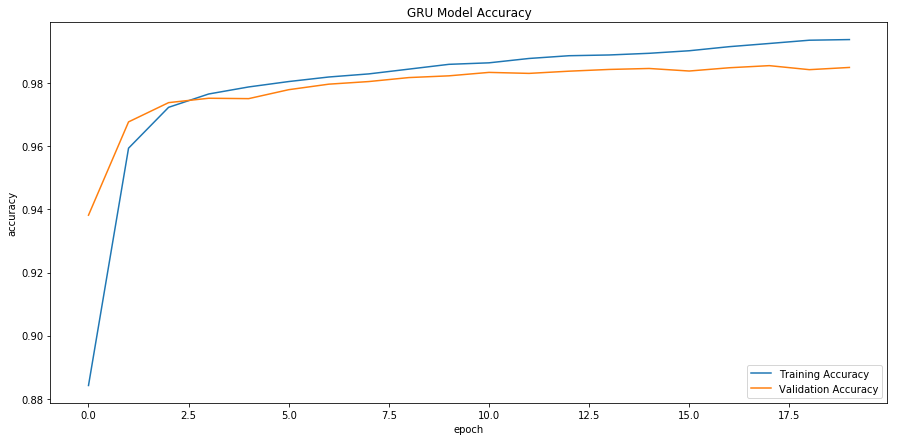

In [69]:
import matplotlib.pyplot as plt

plt.plot(history_2.history['auc_2'])
plt.plot(history_2.history['val_auc_2'])

plt.title('GRU Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.savefig("acc_gru15nov22.png", format="png", bbox_inches='tight', dpi=600) # specify filetype explicitly
plt.show()

plt.close()

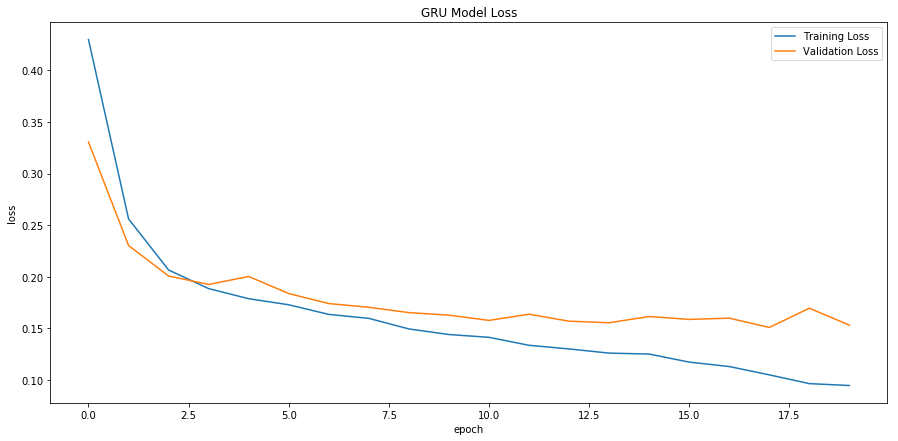

In [70]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])

plt.title('GRU Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.savefig("loss_gru15nov22.png", format="png", bbox_inches='tight', dpi=600) # specify filetype explicitly
plt.show()

plt.close()

In [189]:
pred_prob = GRU_glove.predict_on_batch(X_test)
pred_prob

array([[1.5917420e-04, 9.9973172e-01],
       [6.9310367e-03, 9.9285704e-01],
       [5.7166462e-06, 9.9999321e-01],
       ...,
       [5.4523887e-05, 9.9994200e-01],
       [8.8438064e-05, 9.9994516e-01],
       [6.7878038e-02, 9.3905377e-01]], dtype=float32)

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc
from numpy import interp



In [73]:
import matplotlib
n_classes = y.shape[1]
matplotlib.rc('figure', figsize=(15, 7))


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

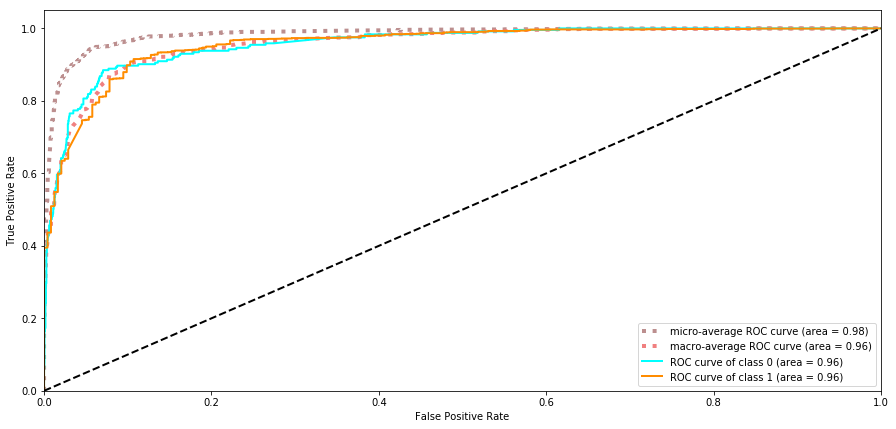

In [74]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
lw = 2
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='rosybrown', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='lightcoral', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'blue', 'green', 'red', 'darkcyan', 'magenta', 'yellow', 'lime', 'pink', 'gray', 'brown', 'olive'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
##plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")

plt.savefig("aucroc_gru15nov22.png", format="png", bbox_inches='tight', dpi=600) # specify filetype explicitly
plt.show()

plt.close()
plt.show()

In [190]:
from sklearn.metrics import average_precision_score
y_pred = GRU_glove.predict(X_test)

from sklearn import metrics
from sklearn.metrics import average_precision_score
print("micro: {:.2f}".format(metrics.average_precision_score(y_test, y_pred, average='micro')))
print("macro: {:.2f} ".format( metrics.average_precision_score(y_test, y_pred, average='macro')))
print("weighted: {:.2f} ".format( metrics.average_precision_score(y_test, y_pred, average='weighted')))
print("sample: {:.2f} ".format( metrics.average_precision_score(y_test, y_pred, average='samples')))  

micro: 0.99
macro: 0.90 
weighted: 0.97 
sample: 0.97 


In [191]:
y_test_flattened = y_test.reshape(-1)
print(y_test_flattened)
y_pred_flattened = y_pred.reshape(-1)
print(y_pred_flattened)
y_pred_flattened = (y_pred_flattened>0.5)
y_pred_flattened
y_test_flattened = (y_test_flattened > 0.5)
y_test_flattened
y_test_flattened.dtype

[0 1 0 ... 1 0 1]
[1.5917420e-04 9.9973172e-01 6.9310367e-03 ... 9.9994516e-01 6.7878038e-02
 9.3905377e-01]


dtype('bool')

In [192]:
cm = confusion_matrix(y_test_flattened, y_pred_flattened)
print (cm)
tnf, fpf, fnf, tpf = confusion_matrix(y_test_flattened, y_pred_flattened).ravel()
print("True positives (TP):", tpf)
print("False positives (FP):", fpf)
print("True negatives (TN):", tnf)
print("False negatives (FN):", fnf)

[[1955  120]
 [ 125 1950]]
True positives (TP): 1950
False positives (FP): 120
True negatives (TN): 1955
False negatives (FN): 125


In [193]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

print("Medidas con Phishing")

recall = tpf / (tpf + fnf)
print("Recall:", recall)

f1 = f1_score(y_test_flattened, y_pred_flattened)
print("F1 Score:", f1)

precision = precision_score(y_test_flattened, y_pred_flattened)
print("Precision:", precision)

Medidas con Phishing
Recall: 0.9397590361445783
F1 Score: 0.9408926417370326
Precision: 0.9420289855072463


In [94]:
y_truep = y_test[:, 0]
y_truep = (y_truep>0.5)
y_predp = y_pred[:, 0]
y_predp = (y_predp>0.5)

y_trueh = y_test[:, 1]
y_trueh = (y_trueh>0.5)
y_predh = y_pred[:, 1]
y_predh = (y_predh>0.5)


In [95]:
cm = confusion_matrix(y_truep, y_predp)
print (cm)
tnp, fpp, fnp, tpp = confusion_matrix(y_truep, y_predp).ravel()
print("True positives (TP):", tpp)
print("False positives (FP):", fpp)
print("True negatives (TN):", tnp)
print("False negatives (FN):", fnp)

[[1811   21]
 [  99  144]]
True positives (TP): 144
False positives (FP): 21
True negatives (TN): 1811
False negatives (FN): 99


In [96]:
cm = confusion_matrix(y_trueh, y_predh)
print (cm)
tnh, fph, fnh, tph = confusion_matrix(y_trueh, y_predh).ravel()
print("True positives (TP):", tph)
print("False positives (FP):", fph)
print("True negatives (TN):", tnh)
print("False negatives (FN):", fnh)

[[ 140  103]
 [  21 1811]]
True positives (TP): 1811
False positives (FP): 103
True negatives (TN): 140
False negatives (FN): 21


In [98]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

print("Medidas con Phishing")

recall = tpp / (tpp + fnp)
print("Recall:", recall)

f1 = f1_score(y_truep, y_predp)
print("F1 Score:", f1)

precision = precision_score(y_truep, y_predp)
print("Precision:", precision)

print("Medidas con Ham")

recall = tph / (tph + fnh)
print("Recall:", recall)

f1 = f1_score(y_trueh, y_predh)
print("F1 Score:", f1)

precision = precision_score(y_trueh, y_predh)
print("Precision:", precision)

Medidas con Phishing
Recall: 0.5925925925925926
F1 Score: 0.7058823529411765
Precision: 0.8727272727272727
Medidas con Ham
Recall: 0.9885371179039302
F1 Score: 0.9668980245595302
Precision: 0.9461859979101358


# **BI-GRU**

In [81]:
# from sklearn.metrics import roc_curve, auc, roc_auc_score
import tensorflow as tf
# from tensorflow.keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, Add, Flatten


# Copiado de GRU ************

from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras import Model, Input, Sequential
from tensorflow.keras.layers import Dense, Input, LSTM, SimpleRNN, Embedding, Dropout, SpatialDropout1D, Activation, Conv1D,GRU
from tensorflow.keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, Add, Flatten
from tensorflow.keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import KFold

# **********



In [63]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
model = SpatialDropout1D(0.2)(embedding_layer)
model = Bidirectional(GRU(128,return_sequences=True,dropout=0.1,recurrent_dropout=0.1 ))(model)
model = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(model)
avg_pool = GlobalAveragePooling1D()(model)
max_pool = GlobalMaxPooling1D()(model)
model = concatenate([avg_pool, max_pool])
dense_layer1 = Dense(2, activation="sigmoid")(model)
Bi_GRU_128 = Model(deep_inputs, dense_layer1)
Bi_GRU_128.compile(loss='binary_crossentropy',optimizer='adam',metrics=[tf.keras.metrics.AUC()])

In [65]:
Bi_GRU_128.summary()

Model: "functional_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 200, 100)     14423600    input_12[0][0]                   
__________________________________________________________________________________________________
spatial_dropout1d_4 (SpatialDro (None, 200, 100)     0           embedding_3[0][0]                
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 200, 256)     176640      spatial_dropout1d_4[0][0]        
_______________________________________________________________________________________

In [73]:
history_3 = Bi_GRU_128.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
52/52 [==============================] - 21s 401ms/step - loss: 0.0196 - auc_3: 0.9997 - val_loss: 0.2429 - val_auc_3: 0.9789
Epoch 2/20
52/52 [==============================] - 21s 400ms/step - loss: 0.0206 - auc_3: 0.9997 - val_loss: 0.2509 - val_auc_3: 0.9772
Epoch 3/20
52/52 [==============================] - 21s 400ms/step - loss: 0.0180 - auc_3: 0.9995 - val_loss: 0.2688 - val_auc_3: 0.9750
Epoch 4/20
52/52 [==============================] - 21s 400ms/step - loss: 0.0189 - auc_3: 0.9996 - val_loss: 0.2578 - val_auc_3: 0.9769
Epoch 5/20
52/52 [==============================] - 21s 400ms/step - loss: 0.0189 - auc_3: 0.9997 - val_loss: 0.2550 - val_auc_3: 0.9762
Epoch 6/20
52/52 [==============================] - 21s 401ms/step - loss: 0.0209 - auc_3: 0.9993 - val_loss: 0.2513 - val_auc_3: 0.9753
Epoch 7/20
52/52 [==============================] - 21s 399ms/step - loss: 0.0206 - auc_3: 0.9996 - val_loss: 0.2502 - val_auc_3: 0.9774
Epoch 8/20
52/52 [=======================

In [74]:
score_bigru_train = Bi_GRU_128.evaluate(X_train, y_train, verbose=1)
print("Train Score:", score_bigru_train[0])
print("Train Accuracy:", score_bigru_train[1])

260/260 [==============================] - 13s 50ms/step - loss: 0.0625 - auc_3: 0.9959
Train Score: 0.0624808706343174
Train Accuracy: 0.9959343075752258


In [75]:
score_bigru_test = Bi_GRU_128.evaluate(X_test, y_test, verbose=1)
print("Train Score:", score_bigru_test[0])
print("Train Accuracy:", score_bigru_test[1])

65/65 [==============================] - 3s 49ms/step - loss: 0.2865 - auc_3: 0.9715
Train Score: 0.2864611744880676
Train Accuracy: 0.9714999198913574


In [ ]:
from tensorflow.keras.models import load_model

# Guardar el modelo en un archivo
Bi_GRU_glove.save('Bi_GRU_model.h5')

In [83]:
# Crear una instancia de kfolds con n=5
kf = KFold(n_splits=5, shuffle=True)

# Lista para almacenar los resultados de precisión
accuracy_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Bi_GRU_128.fit(X_train, y_train, epochs=10, batch_size=64, verbose=0)
    y_pred = np.argmax(Bi_GRU_128.predict(X_test), axis=-1)
    accuracy = accuracy_score(np.argmax(y_test, axis=-1), y_pred)
#     print()
    print(accuracy)
    accuracy_scores.append(accuracy)
    

# Calcular la precisión media en todos los folds
mean_accuracy = np.mean(accuracy_scores)
print('Mean Accuracy over K-flod = 5:', mean_accuracy)

ValueError: in user code:

    /usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.5/dist-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.5/dist-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.5/dist-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/engine/functional.py:386 call
        inputs, training=training, mask=mask)
    /usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/engine/functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /usr/local/lib/python3.5/dist-packages/tensorflow/python/keras/layers/convolutional.py:247 call
        outputs = self._convolution_op(inputs, self.kernel)
    /usr/local/lib/python3.5/dist-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/nn_ops.py:1017 convolution_v2
        name=name)
    /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/nn_ops.py:1147 convolution_internal
        name=name)
    /usr/local/lib/python3.5/dist-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /usr/local/lib/python3.5/dist-packages/tensorflow/python/util/deprecation.py:574 new_func
        return func(*args, **kwargs)
    /usr/local/lib/python3.5/dist-packages/tensorflow/python/util/deprecation.py:574 new_func
        return func(*args, **kwargs)
    /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/nn_ops.py:1888 conv1d
        name=name)
    /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_nn_ops.py:979 conv2d
        data_format=data_format, dilations=dilations, name=name)
    /usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py:744 _apply_op_helper
        attrs=attr_protos, op_def=op_def)
    /usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/func_graph.py:593 _create_op_internal
        compute_device)
    /usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py:3485 _create_op_internal
        op_def=op_def)
    /usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py:1975 __init__
        control_input_ops, op_def)
    /usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py:1815 _create_c_op
        raise ValueError(str(e))

    ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node functional_8/conv1d_4/conv1d}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](functional_8/conv1d_4/conv1d/ExpandDims, functional_8/conv1d_4/conv1d/ExpandDims_1)' with input shapes: [?,1,1,256], [1,3,256,64].


In [ ]:
from tensorflow.keras.models import load_model

# Cargar el modelo desde el archivo
model1 = load_model('Bi_GRU_model.h5')